In [6]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import seaborn as sns
from tensorflow.keras import optimizers

In [7]:
model = load_model('/10_0.83881.h5')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_dir = 'validation'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 32,
                 class_mode = 'categorical',
                 shuffle = False)

Found 4800 images belonging to 6 classes.


In [9]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 150)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

150/150 [==============================] - 1367s 9s/step - loss: 0.8389 - accuracy: 0.7002
Loss = 0.83891
Accuracy = 0.70021


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_generator.reset()

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
               precision    recall  f1-score   support

        anger       0.74      0.60      0.66       800
embarrassment       0.74      0.67      0.70       800
        happy       0.87      0.94      0.90       800
   neutrality       0.64      0.89      0.75       800
          sad       0.71      0.71      0.71       800
       unrest       0.48      0.40      0.43       800

     accuracy                           0.70      4800
    macro avg       0.70      0.70      0.69      4800
 weighted avg       0.70      0.70      0.69      4800



In [9]:
test_generator.reset()

Y_pred = model.predict(test_generator)

In [10]:
y_pred = np.argmax(Y_pred, axis=1)

In [19]:
import pandas as pd

In [20]:
cm = confusion_matrix(test_generator.classes, y_pred)
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']

cm_df = pd.DataFrame(cm, index = label,
                     columns = label
                    )

cm_df

,anger,embarrassment,happy,neutrality,sad,unrest
anger,479,47,36,57,57,124
embarrassment,40,536,9,82,11,122
happy,17,9,748,10,9,7
neutrality,14,10,10,715,34,17
sad,36,10,25,87,566,76
unrest,57,116,33,160,117,317


In [21]:
cm_df.to_csv('confusion_matrix.csv')

In [22]:
print('Classification Report')
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
cr = classification_report(test_generator.classes, y_pred, target_names=target_names)
print(cr)

Classification Report
               precision    recall  f1-score   support

        anger       0.74      0.60      0.66       800
embarrassment       0.74      0.67      0.70       800
        happy       0.87      0.94      0.90       800
   neutrality       0.64      0.89      0.75       800
          sad       0.71      0.71      0.71       800
       unrest       0.48      0.40      0.43       800

     accuracy                           0.70      4800
    macro avg       0.70      0.70      0.69      4800
 weighted avg       0.70      0.70      0.69      4800



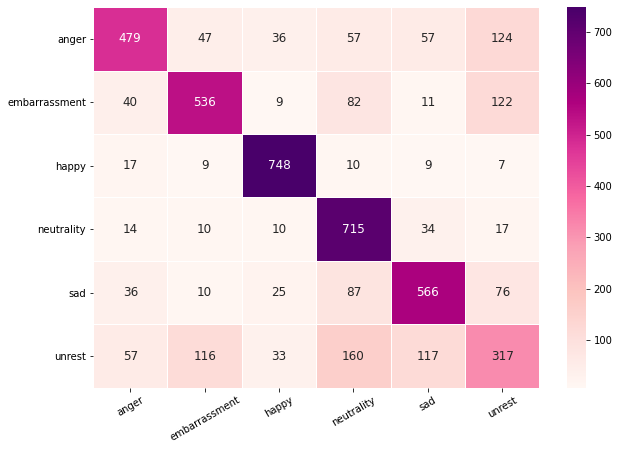

In [33]:
import seaborn as sns

cm = confusion_matrix(test_generator.classes, y_pred)
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
plt.figure(figsize=(10,7))
sns.heatmap(cm, xticklabels=label, yticklabels=label,annot=True, annot_kws={"size": 12}, cmap='RdPu',fmt="g", linewidths = 0.5)
plt.xticks(rotation = 30 )
#plt.xlabel('Predicted label', fontsize=20)
#plt.ylabel('True Label', fontsize=20)
plt.savefig('/modelcheck/confusion_matrix.jpg')


```
anger를 ['embarrassment', 'happy', 'neutrality', 'sad', 'unrest']라고 예측한 경우
[47, 36, 57, 57, 124]
```       